In [1]:
"""Using Linear Kernel function"""
"""Plotting 2D Decision Boundary"""
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [16]:
iris = datasets.load_iris()# Select 2 features / variables
x = iris.data[:, :2] # we only take the first two features.
y = iris.target
feature_names = iris.feature_names[:2]
classes = iris.target_names

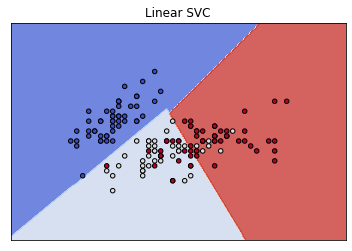

In [17]:
def make_meshgrid(x, y, h=0.02):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1 
    y_max = y.max() + 1 
    #defining the scale
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
    
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


model = svm.SVC(kernel="linear")
clf = model.fit(x, y)

fig, ax = plt.subplots()

title = ("Linear SVC")
# Set-up grid for plotting.
X0, X1 = x[:, 0], x[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())

ax.set_title(title)
plt.show()

In [7]:
"""Plotting 3D Decision Boundary"""
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D

In [12]:
iris = datasets.load_iris()
X = iris.data[:, :3] # we only take the first three features.
Y = iris.target

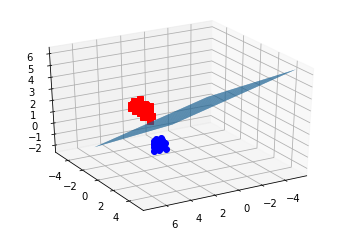

In [15]:
#make it binary classification problem
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]
model = svm.SVC(kernel='linear')

clf = model.fit(X, Y)
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()